In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('D:\DataScience\June\Linear_Regression\Medical Cost Personal Datasets\datasets_13720_18513_insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df_cat=pd.get_dummies(df)
df_cat.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
df_cat.info()
df_cat.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null uint8
sex_male            1338 non-null uint8
smoker_no           1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.3 KB


(1338, 12)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
df.shape

(1338, 7)

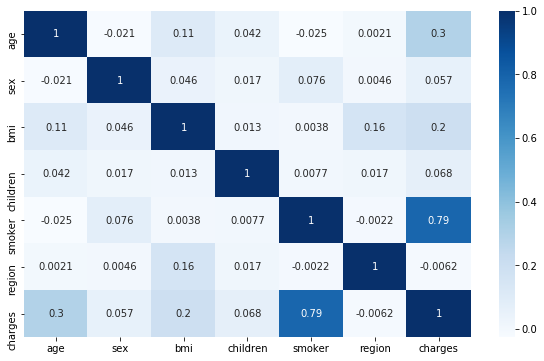

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

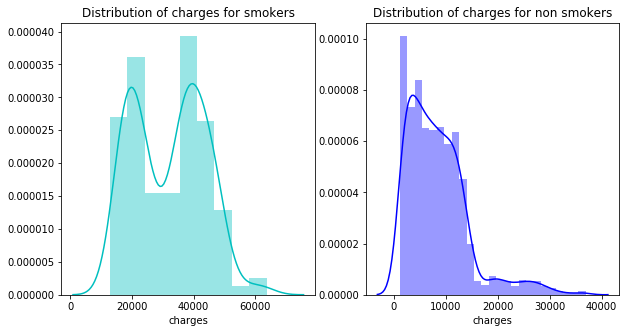

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(df[(df.smoker==1)]['charges'],color='c')
plt.title('Distribution of charges for smokers')
plt.subplot(122)
sns.distplot(df[(df.smoker==0)]['charges'],color='b')
plt.title('Distribution of charges for non smokers')
plt.show()

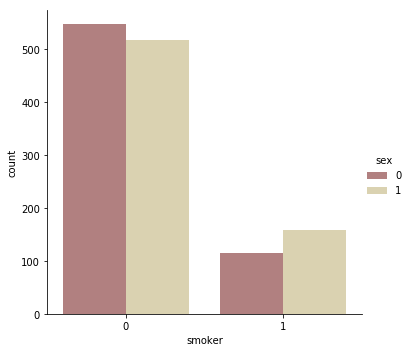

In [17]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='pink',data=df)

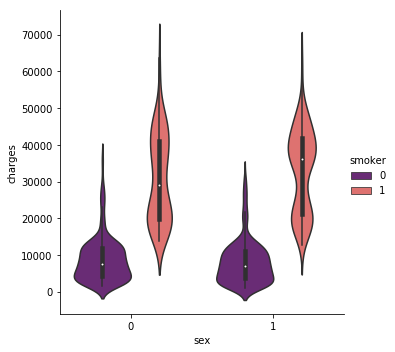

In [18]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='violin',data=df,palette='magma')

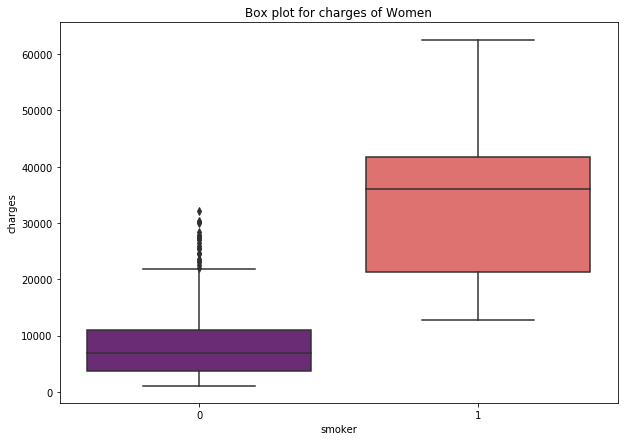

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='smoker',y='charges',data=df[(df.sex==1)],palette='magma')
plt.title('Box plot for charges of Women')
plt.show()

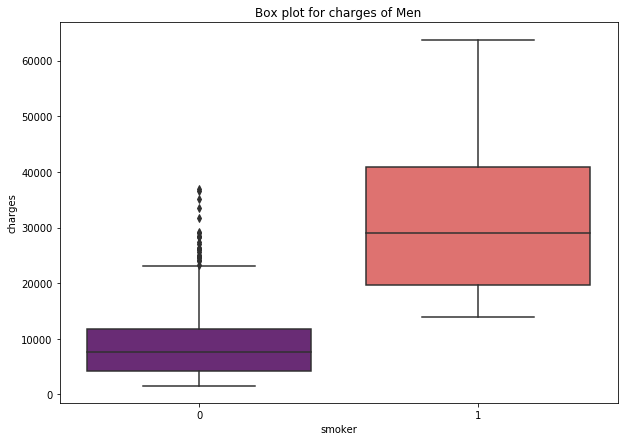

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='smoker',y='charges',data=df[(df.sex==0)],palette='magma')
plt.title('Box plot for charges of Men')
plt.show()

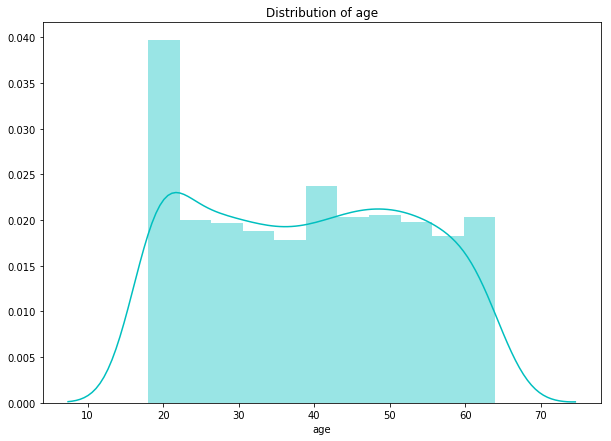

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'],color='c')
plt.title('Distribution of age')
plt.show()

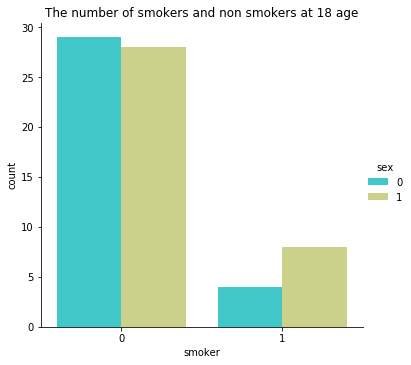

In [22]:
sns.catplot(x='smoker',kind='count',hue='sex',data=df[(df.age==18)],palette='rainbow')
plt.title('The number of smokers and non smokers at 18 age')
plt.show()

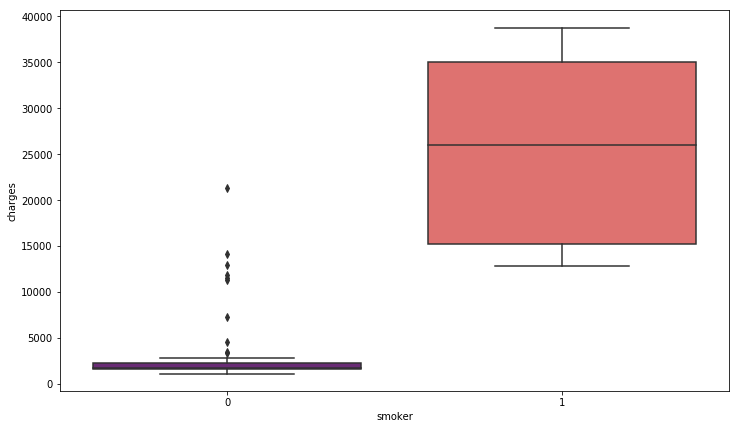

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(x='smoker',y='charges',data=df[(df.age==18)],palette='magma')
plt.show()

<Figure size 720x504 with 0 Axes>

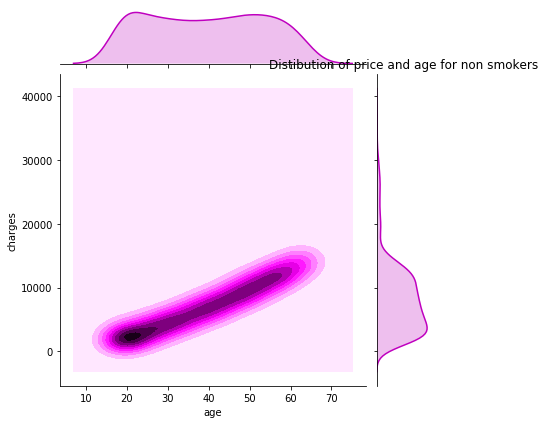

In [24]:
plt.figure(figsize=(10,7))
sns.jointplot(x='age',y='charges',data=df[(df.smoker==0)],kind='kde',color='m')
plt.title('Distibution of price and age for non smokers')
plt.show()

<Figure size 1080x720 with 0 Axes>

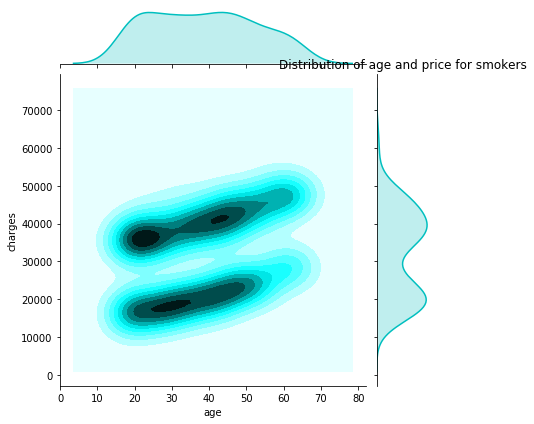

In [25]:
plt.figure(figsize=(15,10))
sns.jointplot(x='age',y='charges',data=df[(df.smoker==1)],kind='kde',color='c')
plt.title('Distribution of age and price for smokers')
plt.show()

In [26]:
p=figure(plot_width=500,plot_height=450)
p.circle(x=df[(df.smoker==0)].age,y=df[(df.smoker==0)].charges, size=7,line_color='navy',fill_color='pink',fill_alpha=0.9)
show(p)

NameError: name 'figure' is not defined

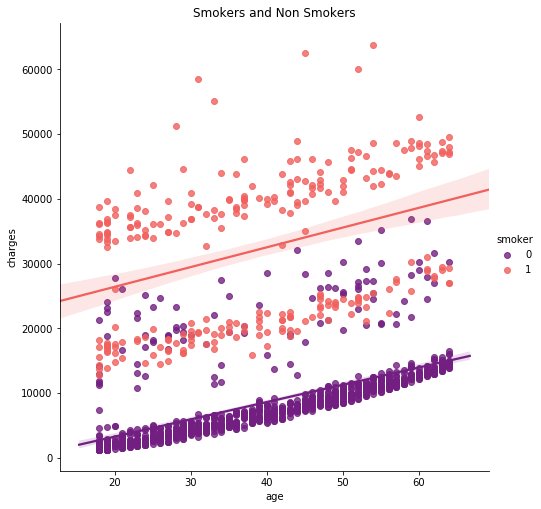

In [28]:
sns.lmplot(x='age',y='charges',hue='smoker',data=df,palette='magma',height=7)
plt.title('Smokers and Non Smokers')
plt.show()

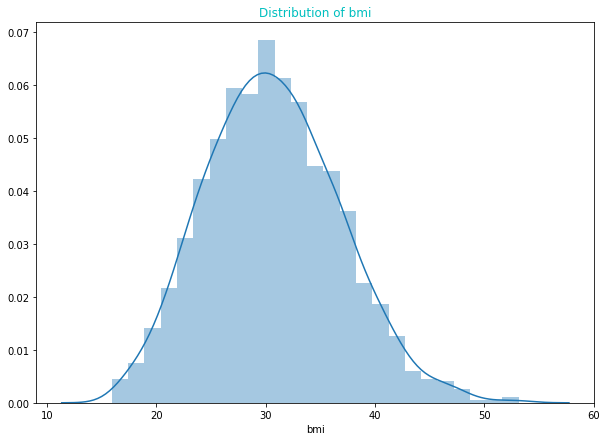

In [31]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Distribution of bmi',color='c')
plt.show()

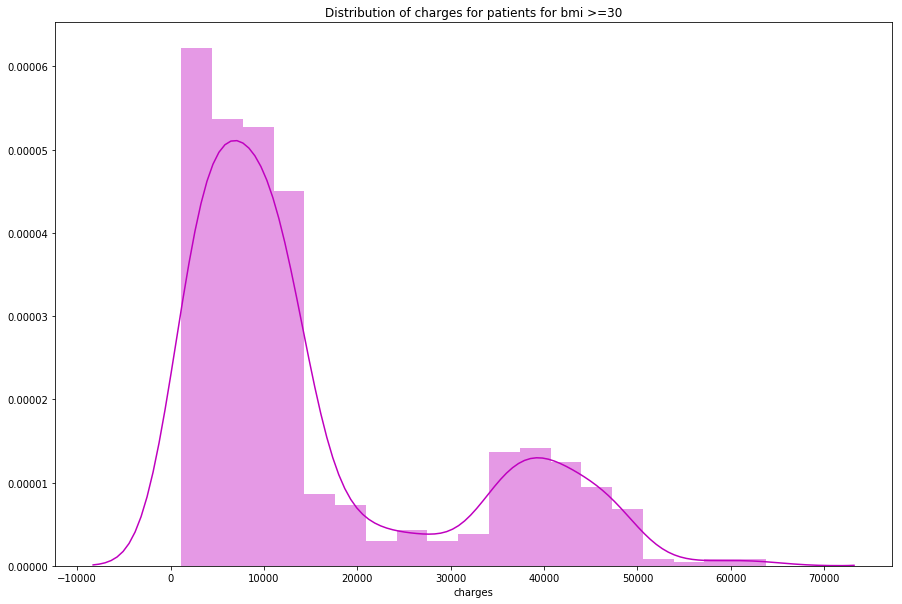

In [32]:
plt.figure(figsize=(15,10))
sns.distplot(df[(df.bmi>=30)]['charges'],color='m')
plt.title('Distribution of charges for patients for bmi >=30')
plt.show()

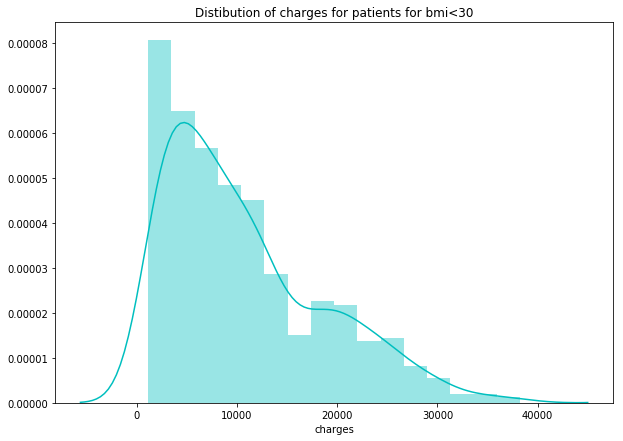

In [33]:
plt.figure(figsize=(10,7))
sns.distplot(df[(df.bmi<30)]['charges'],color='c')
plt.title('Distibution of charges for patients for bmi<30')
plt.show()

C:\Users\91897\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'palette'
  s)


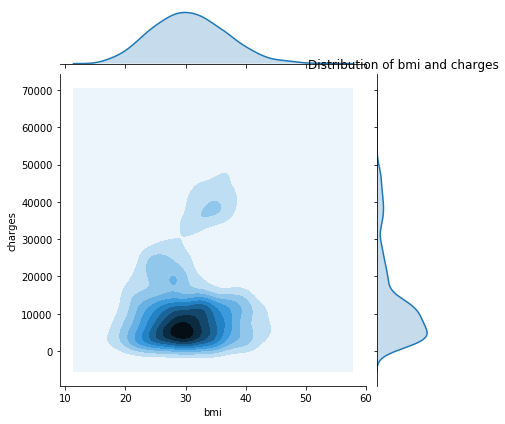

In [36]:
sns.jointplot(x='bmi',y='charges',data=df,kind='kde',palette='magma')
plt.title('Distribution of bmi and charges')
plt.show()

C:\Users\91897\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


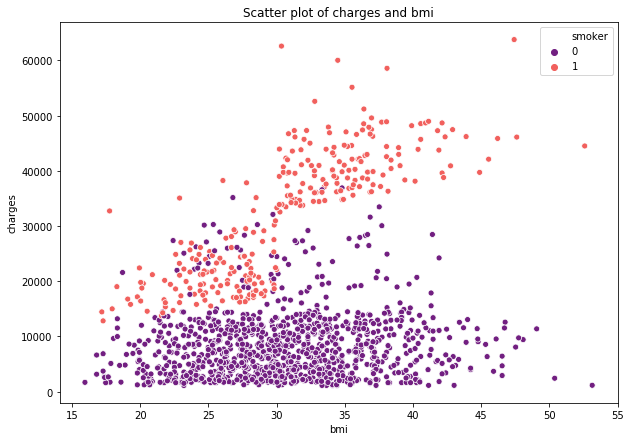

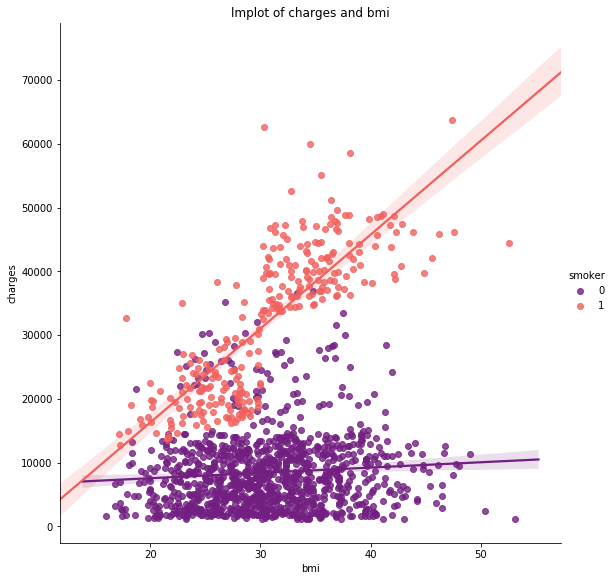

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
plt.title('Scatter plot of charges and bmi')
sns.lmplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker',size=8)
plt.title('lmplot of charges and bmi')
plt.show()

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\Users\91897\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


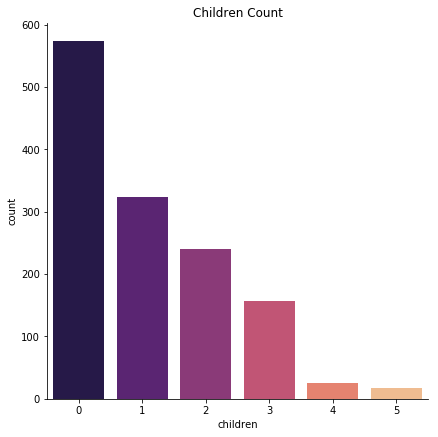

In [39]:
sns.catplot(x='children',kind='count',data=df,palette='magma',size=6)
plt.title('Children Count')
plt.show()

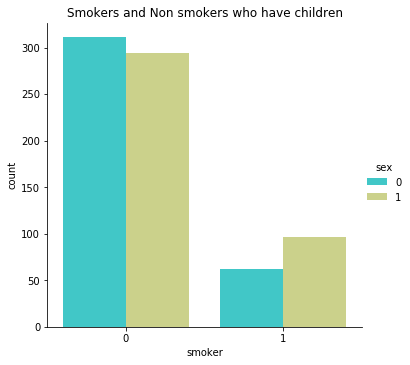

In [40]:
sns.catplot(x='smoker',kind='count',data=df[(df.children>0)],hue='sex',palette='rainbow')
plt.title('Smokers and Non smokers who have children')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [42]:
x=df.drop(['charges'],axis=1)
y=df.charges

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(reg.score(x_test,y_test))

0.7960709949046044


In [47]:
quad=PolynomialFeatures(degree=2)
x_quad=quad.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_quad,y,test_size=0.2,random_state=25)
plr=LinearRegression()
plr.fit(x_train,y_train)
y_pred_plr=plr.predict(x_test)
print(plr.score(x_test,y_test))

0.871968515956835


In [55]:
forest=RandomForestRegressor(n_estimators=100,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)
y_pred_forest=forest.predict(x_test)
y_train_forest=forest.predict(x_train)
print('mean_squared_error_test: {}'.format(mean_squared_error(y_test,y_pred_forest)))
print('mean_squared_error_train: {}'.format(mean_squared_error(y_train_forest,y_train)))
print('r2_score_test: {}'.format(r2_score(y_test,y_pred_forest)))
print('r2_score_train: {}'.format(r2_score(y_train_forest,y_train)))

mean_squared_error_test: 17780969.206837554
mean_squared_error_train: 3684760.583418332
r2_score_test: 0.8740632487235089
r2_score_train: 0.9727768717868691


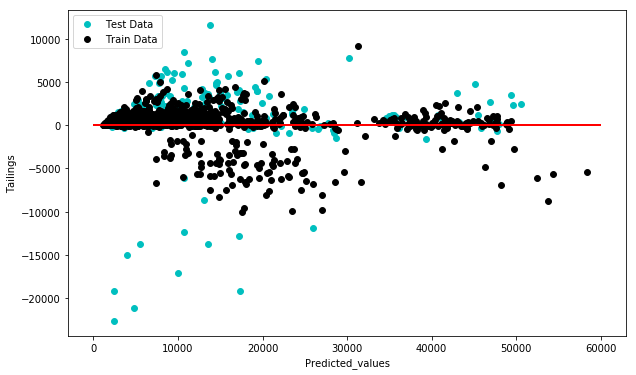

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred_forest,y_pred_forest-y_test,c='c',marker='o',s=35,label='Test Data')
plt.scatter(y_train_forest,y_train_forest-y_train,c='black',marker='o',s=35,label='Train Data')
plt.xlabel('Predicted_values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=60000,lw=2,color='red')
plt.show()